# Installation

In [ ]:
!pip install numpy pandas matplotlib scikit-learn

# Importing

In [56]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Loading Dataset

In [29]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [30]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Features

In [31]:
X = df[['sepal_length','petal_length']].values  # Features
y = iris.target 

In [32]:
iris_df = pd.DataFrame(data=X, columns=['Sepal Length','petal_length'])
iris_df['Species'] = y

# Let's take 'Setosa' vs. 'Non-setosa' for binary classification
iris_df['Binary Species'] = iris_df['Species'].apply(lambda x: 1 if x == 0 else 0)

In [33]:
iris_df.head()

,Sepal Length,petal_length,Species,Binary Species
0,5.1,1.4,0,1
1,4.9,1.4,0,1
2,4.7,1.3,0,1
3,4.6,1.5,0,1
4,5.0,1.4,0,1


In [37]:
X = iris_df[['Sepal Length','petal_length']].values
y = iris_df['Binary Species'].values

# Model Building

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

# Evaluation Metrics

In [55]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Visualization

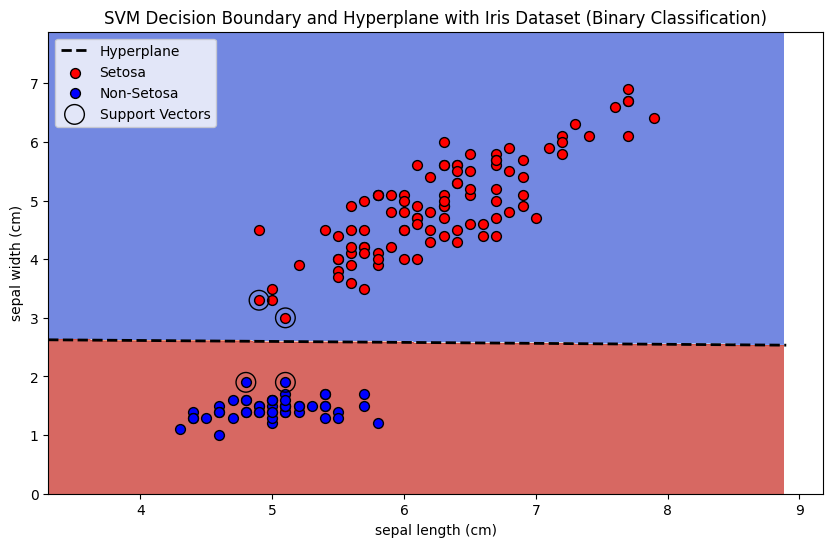

In [58]:
# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on the mesh to plot the decision regions
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define colors for each class
colors = ['#FF0000', '#0000FF']  # Red for Iris Setosa, Blue for Non-Setosa

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Draw the hyperplane
w = model.coef_[0]  # Weight vector
b = model.intercept_[0]  # Bias term
x1_range = np.linspace(x_min, x_max, 100)
x2_hyperplane = -(w[0] / w[1]) * x1_range - (b / w[1])

# Plot the hyperplane
plt.plot(x1_range, x2_hyperplane, 'k--', label='Hyperplane', linewidth=2)

# Plot the training points with specific colors and labels
for idx, color, label in zip([0, 1], colors, ['Setosa', 'Non-Setosa']):
    plt.scatter(X[y == idx, 0], X[y == idx, 1], c=color, label=label, edgecolor='k', s=50)

# Plot support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
            s=200, facecolors='none', edgecolors='k', label='Support Vectors')

# Add labels, legend, and title
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('SVM Decision Boundary and Hyperplane with Iris Dataset (Binary Classification)')
plt.legend(loc='upper left')
plt.show()